In [1]:
# Import libraries for data handling, text feature extraction, machine learning, and evaluation
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load dataset from CSV file
df = pd.read_csv('malicious_phish.csv')

# Keep only url and type columns
df = df[['url', 'type']]

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows with missing url or type
df.dropna(subset=['url', 'type'], inplace=True)

# Convert urls to lowercase for consistency
df['url'] = df['url'].str.lower()

In [3]:
# Label phishing as 1, all others as 0
df['label'] = df['type'].map(lambda x: 1 if x == 'phishing' else 0)

# Drop rows where label could not be mapped
df = df.dropna(subset=['label'])

In [4]:
# Use character-level n-grams (3 to 5 characters) with TF-IDF
# This captures patterns in the URL text that may indicate phishing
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5))

# Transform urls into numeric feature matrix
X = vectorizer.fit_transform(df['url'])

# Target labels
y = df['label']

In [5]:
# Split data into train and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [6]:
# Initialize Logistic Regression classifier
# max_iter=1000 ensures convergence
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train model
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
# Predict on test set
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Model Evaluation Metrics:
Accuracy : 0.9606
Precision: 0.9234
Recall   : 0.7980
F1 Score : 0.8561


In [8]:
# Print detailed classification report with precision, recall, f1 per class
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Phishing', 'Phishing']))


Classification Report:
              precision    recall  f1-score   support

Non-Phishing       0.97      0.99      0.98     82055
    Phishing       0.92      0.80      0.86     14114

    accuracy                           0.96     96169
   macro avg       0.94      0.89      0.92     96169
weighted avg       0.96      0.96      0.96     96169



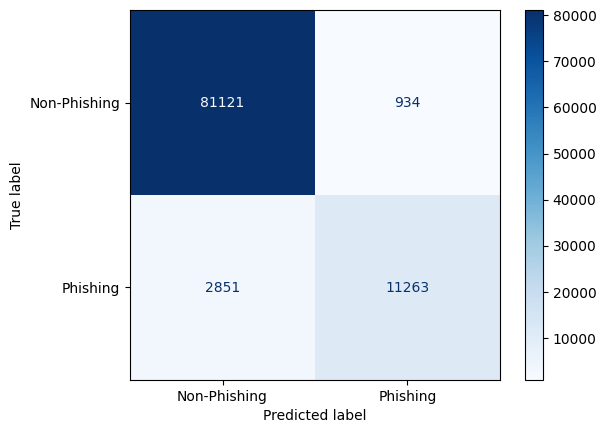

In [9]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a labeled plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Phishing', 'Phishing'])
disp.plot(cmap='Blues', values_format='d')  # 'd' for integer formatting